In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
p = r'C:\Users\YATISH\Desktop\Projects\urban calp\data.xlsx'
df = pd.read_excel(p,sep = 'delimiter',header = None)


In [3]:
dff = df.copy()
dff.drop(0,inplace = True)
dff.reset_index(drop = True ,inplace = True)

In [4]:
from datetime import datetime
dates = []
for d in dff[2]:
    dates.append(d)
dates = set(dates)
dates = sorted(dates, reverse=False)

In [6]:
# creating keys for dict
dict={}
for dt in dates:
    dict[dt]=[]

In [7]:
for i in range(len(dff[0])):
    data = [dff[1][i],(dff[3][i] - dff[2][i]).days,dff[4][i],dff[5][i]]
    dict[dff[2][i]].append(data)
dict

{datetime.datetime(2017, 12, 1, 0, 0): [[204, 3, 'B', 14],
  [257, 0, 'D', 13],
  [309, 2, 'B', 14],
  [454, 0, 'B', 12],
  [461, 4, 'C', 13],
  [481, 1, 'C', 13],
  [542, 5, 'D', 19],
  [552, 0, 'B', 8],
  [673, 2, 'B', 14],
  [892, 3, 'B', 15],
  [908, 0, 'D', 19],
  [994, 1, 'C', 14],
  [1102, 2, 'D', 13],
  [1119, 2, 'D', 6],
  [1191, 2, 'B', 14],
  [1232, 1, 'D', 10],
  [1301, 1, 'D', 19],
  [1492, 3, 'D', 9],
  [1584, 3, 'C', 14],
  [1593, 1, 'C', 17],
  [1660, 0, 'C', 13],
  [1661, 3, 'B', 12],
  [1743, 5, 'D', 8],
  [1750, 4, 'B', 7],
  [1833, 1, 'B', 14],
  [1905, 0, 'A', 14],
  [1981, 1, 'C', 13],
  [1982, 0, 'D', 9],
  [2047, 3, 'C', 14],
  [2592, 1, 'A', 14],
  [2637, 2, 'C', 13],
  [2672, 2, 'B', 10],
  [2694, 5, 'C', 14],
  [2741, 1, 'A', 14],
  [2884, 0, 'D', 10],
  [3025, 5, 'C', 18],
  [3075, 0, 'C', 14],
  [3202, 0, 'A', 11],
  [3368, 3, 'C', 13],
  [3385, 0, 'B', 10],
  [3605, 2, 'A', 17],
  [3723, 3, 'D', 15],
  [3942, 2, 'A', 12],
  [4194, 2, 'C', 11],
  [4456, 1, 

In [8]:
#creating month dict. keys
m_dict = {}
for dt in dict.keys():
    date1 = dt.strftime('%Y %m %d') #converting time-stamp to normal date
    date1 = date1.split()
    m_dict[date1[1]] = []
m_dict

{'12': [],
 '01': [],
 '02': [],
 '03': [],
 '04': [],
 '05': [],
 '06': [],
 '07': [],
 '08': [],
 '09': [],
 '10': [],
 '11': []}

In [48]:
all_users = []
for dt in dict.keys():
    date = dt.strftime('%Y %m %d') #converting time-stamp to normal date
    date = date.split()
    m = date[1]
    for i in range(len(dict[dt])):
        user = dict[dt][i][0]
        if dict[dt][i][0] not in users:
            m_dict[m].append(user)
            all_users.append(dict[dt][i][0])
m_dict

KeyError: 12

In [53]:
print(m_dict.keys())
print(204 in m_dict['01'])

dict_keys(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11'])
False


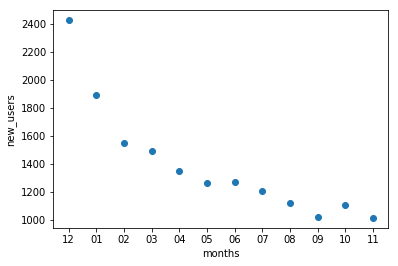

In [28]:
# 1 ANswer
y = []
x = []
for i in m_dict.keys():
    y.append(len(m_dict[i]))
    x.append(i)
plt.scatter(x,y)
plt.xlabel("months")
plt.ylabel("new_users")
plt.show()

In [64]:
# dec 2017 30 day repeat cycle

# total no.of orders (t)
t = 0
users = []
for dt in dict.keys():
    date = dt.strftime('%Y %m %d') #converting time-stamp to normal date
    date = date.split()
    if date[1] == "12":
        t = t + len(dict[dt])
        for i in range(len(dict[dt])):
            if dict[dt][i][0] not in users:
                users.append(dict[dt][i][0])
        
print(t)
print(len(users))

2761
2424


In [70]:
# creating keys for dict_dj
dict_d ={}
for u in users:
    dict_d[u] = []
for i in range(len(dff[0])):
    if dff[1][i] in users:
        data = [dff[3][i]]
        dict_d[dff[1][i]].append(data)

In [81]:
# (n) repeators with less than 30 days
n_list =[]
for k in dict_d.keys():
    if len(dict_d[k]) > 1:
        diff = (dict_d[k][1][0] - dict_d[k][1][0]).days 
        if diff < 30:
            n_list.append(dict_d[k])
n = len(n_list)
print("ans 2 is = ",n/t*100)

ans 2 is =  48.85910901847157


In [85]:
# 90 day repeat cycle for jan,feb, march
t = 0
users = []
for dt in dict.keys():
    date = dt.strftime('%Y %m %d') #converting time-stamp to normal date
    date = date.split()
    if date[1] in ["01","02","03"] :
        t = t + len(dict[dt])
        for i in range(len(dict[dt])):
            if dict[dt][i][0] not in users:
                users.append(dict[dt][i][0])
        
print(t)
print(len(users))

7678
5704


In [86]:
# creating keys for dict_jfm
dict_d ={}
for u in users:
    dict_d[u] = []
for i in range(len(dff[0])):
    if dff[1][i] in users:
        data = [dff[3][i]]
        dict_d[dff[1][i]].append(data)
        

In [87]:
# (n) repeators with less than 90 days
n_list =[]
for k in dict_d.keys():
    if len(dict_d[k]) > 1:
        diff = (dict_d[k][1][0] - dict_d[k][1][0]).days 
        if diff < 90:
            n_list.append(dict_d[k])
n = len(n_list)
print("ans 2 is = ",n/t*100)

ans 2 is =  35.64730398541287
